In [2]:
# Predizer pela sequencia genética qual o sexo da pessoa. 
# Os dados faltantes são aqueles que precisam ser preditos

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [4]:
data = pd.read_csv('Dataset/Genetic mapping_exercise.csv', header=0)
#file = 'Dataset/Genetic mapping_exercise.xls'
#data = pd.read_excel(file)

# new line to concatenate
datadp = data.head(1)

# concatenate dataset to reset index
data = pd.concat([datadp, data], axis=0)

# reset index
data = data.reset_index()

# remove columns
data = data.drop(columns=['index','ID','Unnamed: 39','Unnamed: 40','Unnamed: 41'])
data = data.drop([0])

print(data.shape)
print(list(data.columns))
data

(1517, 38)
['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'Sexo']


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
1,1,1,1.0,2,1,1,97,61,12,22,...,0,0,0,0,0,0,0,0,0,2.0
2,1,2,1.0,1,1,2,20,32,20,75,...,2,2,1,2,2,1,2,1,1,2.0
3,1,1,1.0,1,0,2,16,35,20,59,...,2,2,2,2,2,2,2,2,2,1.0
4,1,9,1.0,0,2,2,20,26,20,48,...,2,1,2,2,2,2,2,2,2,2.0
5,2,2,1.0,0,1,4,98,25,12,42,...,0,0,0,0,0,0,0,0,0,2.0
6,2,2,1.0,5,0,7,8,59,10,0,...,2,2,2,2,2,2,2,2,2,1.0
7,2,1,1.0,3,1,7,8,46,10,0,...,2,2,2,2,2,2,2,2,2,1.0
8,2,2,1.0,4,0,7,5,99,16,60,...,2,2,2,2,2,2,2,2,2,2.0
9,2,2,1.0,3,2,7,6,57,10,0,...,2,2,2,2,2,2,2,2,2,2.0
10,1,2,1.0,2,1,1,8,64,14,38,...,0,0,0,0,0,0,0,0,0,2.0


In [5]:
# organizar dados
data_pred = data.sort_values(['Sexo'])

# separar os dados 'NaN'
data_pred = data_pred.tail(92)
#data_pred = data_pred.astype('float64')

# drop 'NaN' no dataset para traino e test
data = data.dropna()

# converter dados para binarios
data['Sexo'] = data['Sexo'].map({1.0: 0, 2.0: 1})

# converter os dados para float
data = data.astype('float64')
print(data.shape)
data

(1425, 38)


c:\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
1,1.0,1.0,1.0,2.0,1.0,1.0,97.0,61.0,12.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,1.0,1.0,1.0,2.0,20.0,32.0,20.0,75.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0,2.0,16.0,35.0,20.0,59.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,1.0,9.0,1.0,0.0,2.0,2.0,20.0,26.0,20.0,48.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
5,2.0,2.0,1.0,0.0,1.0,4.0,98.0,25.0,12.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2.0,2.0,1.0,5.0,0.0,7.0,8.0,59.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
7,2.0,1.0,1.0,3.0,1.0,7.0,8.0,46.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
8,2.0,2.0,1.0,4.0,0.0,7.0,5.0,99.0,16.0,60.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
9,2.0,2.0,1.0,3.0,2.0,7.0,6.0,57.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
10,1.0,2.0,1.0,2.0,1.0,1.0,8.0,64.0,14.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
'''# Create dummy variables
cat_vars=['H1', 'H2', 'H3', 'H4', 'H5', 'N2', 'N3', 'N4', 'N5', 'G1', 'G2', 'G3', 'G4', 'G5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Sexo']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['H1', 'H2', 'H3', 'H4', 'H5', 'N2', 'N3', 'N4', 'N5', 'G1', 'G2', 'G3', 'G4', 'G5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Sexo']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]'''

"# Create dummy variables\ncat_vars=['H1', 'H2', 'H3', 'H4', 'H5', 'N2', 'N3', 'N4', 'N5', 'G1', 'G2', 'G3', 'G4', 'G5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Sexo']\nfor var in cat_vars:\n    cat_list='var'+'_'+var\n    cat_list = pd.get_dummies(data[var], prefix=var)\n    data1=data.join(cat_list)\n    data=data1\n\ncat_vars=['H1', 'H2', 'H3', 'H4', 'H5', 'N2', 'N3', 'N4', 'N5', 'G1', 'G2', 'G3', 'G4', 'G5', 'C1', 'C2', 'C3', 'C4', 'C5', 'Sexo']\ndata_vars=data.columns.values.tolist()\nto_keep=[i for i in data_vars if i not in cat_vars]"

In [7]:
# final data columns
data_final=data
data_final.columns.values

array(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4',
       'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'Sexo'], dtype=object)

In [8]:
data_final_vars=data_final.columns.values.tolist()
y=['Sexo']
X=[i for i in data_final_vars if i not in y]

In [9]:
# Feature Selection (Recursive Feature Elimination (RFE))
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

c:\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True False False False False False False False False False False
 False  True False  True False False False  True  True  True False  True
  True  True  True  True  True  True  True  True False False False  True
  True]
[ 1  1 18  5  8 13 20 14 15 12 17 16  4  1 10  1  3 19  6  1  1  1  7  1
  1  1  1  1  1  1  1  1  9  2 11  1  1]


In [10]:
cols=['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6',
      'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1',
      'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

#cols=['H1', 'H2', 'N6', 'N8', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C8', 'C9', 'Sexo']

X=data_final[cols]
y=data_final['Sexo']

In [11]:
'''# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())'''

'# Implementing the model\nimport statsmodels.api as sm\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary())'

In [12]:
# Logistic Regression Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# accuracy of training
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [14]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state = 7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv = kfold, scoring = scoring)
print("10-fold cross validation average accuracy: %.3f" %(results.mean()))

10-fold cross validation average accuracy: 0.649


In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139 153]
 [129 292]]


In [16]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.52      0.48      0.50       292
        1.0       0.66      0.69      0.67       421

avg / total       0.60      0.60      0.60       713



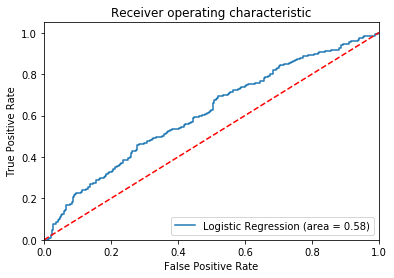

In [17]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('genetic_mapping_exercise1')
plt.show()

In [18]:
# dropar coluna sexo para gerar resultado de predição
data_pred = data_pred.drop(columns=['Sexo'])

# resultado de predição
y_predicted = logreg.predict(data_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [19]:
# resetar index
data_pred = data_pred.reset_index()
data_pred

# converter em DataFrame a predição
y_predicted = pd.DataFrame({'Sexo': y_predicted})

# concatena os dados
data_result = pd.concat([data_pred,y_predicted], axis=1)

# converter dados para 1 e 2
data_result['Sexo'] = data_result['Sexo'].map({0.0: 1, 1.0: 2})

# export dataset
data_result.to_excel('genetic_mapping_data_result.xlsx','Sheet1')
data_result

,index,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
0,13,1,2,1.0,0,0,1,11,33,15,...,2,2,2,2,2,2,2,2,2,2
1,18,1,1,1.0,2,2,6,0,77,9,...,0,0,0,0,0,0,0,0,0,1
2,28,2,2,1.0,0,2,5,12,28,12,...,2,2,2,2,2,2,2,2,2,1
3,35,1,1,1.0,3,2,0,18,44,17,...,2,2,2,2,2,2,2,2,2,2
4,48,1,2,3.0,3,2,2,8,64,12,...,2,2,2,2,2,2,2,2,2,1
5,55,1,2,3.0,0,1,4,16,43,20,...,2,2,2,2,2,2,2,2,2,1
6,62,1,3,3.0,0,2,2,12,33,13,...,0,0,0,0,0,0,0,0,0,2
7,63,1,2,3.0,1,0,6,12,31,16,...,2,2,2,2,2,2,2,2,2,2
8,72,2,2,3.0,3,1,8,98,67,9,...,9,9,9,9,9,9,9,9,9,2
9,73,2,1,3.0,2,1,2,98,61,12,...,0,0,0,0,0,0,0,0,0,2
